In [5]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt as eks
import ImageView as imv

import os
import colour
from colour.plotting import *
from colour_demosaicing import (demosaicing_CFA_Bayer_Menon2007, mosaicing_CFA_Bayer)

In [34]:
def algorithmDemo(file):
    original = imageio.imread(file)

    mosaic = np.zeros(original.shape[:2]) # Alloker plass
    mosaic[ ::2 , ::2] = original[ ::2 , ::2 , 0] # R- kanal
    mosaic[1::2 , ::2] = original[1::2 , ::2 , 1] # G- kanal
    mosaic[ ::2 , 1::2] = original[ ::2 , 1::2 , 1] # G- kanal
    mosaic[1::2 , 1::2] = original[1::2 , 1::2 , 2] # B- kanal

    r = mosaic[ ::2 , ::2]
    g = np.clip((mosaic[ ::2 , 1::2] + mosaic[1::2 , ::2]) // 2, a_min = 0, a_max = 1)
    b = mosaic[1::2 , 1::2]

    new = np.dstack([r, g, b])
    new[new < 0] = 0
    new[new > 1] = 1

    imv.viewDemosaic(original, mosaic, new, "Demosaicing - Algorithm")


def packageDemo(file):
    original = colour.io.read_image(file)

    mosaic = mosaicing_CFA_Bayer(original)
    new = demosaicing_CFA_Bayer_Menon2007(mosaic)
    new[new < 0] = 0
    new[new > 1] = 1

    imv.viewDemosaic(original, mosaic, new, "Demosaicing - Package")

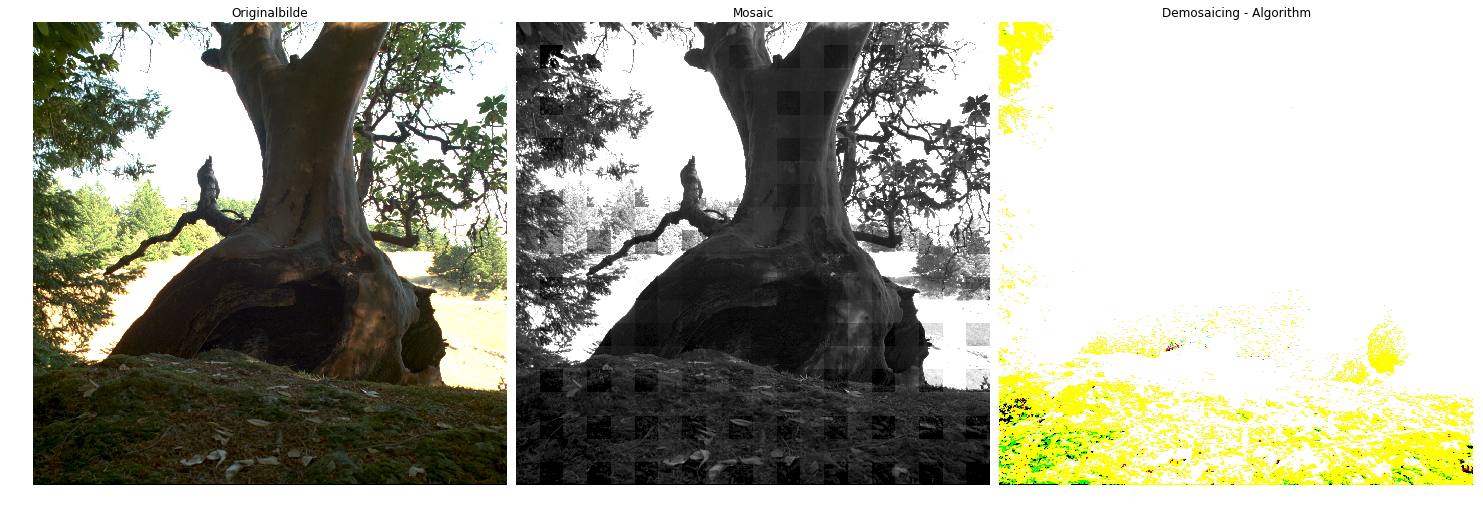

In [35]:
filepath = "../hdr-bilder/Tree/Tree_00032.png"

algorithmDemo(filepath)

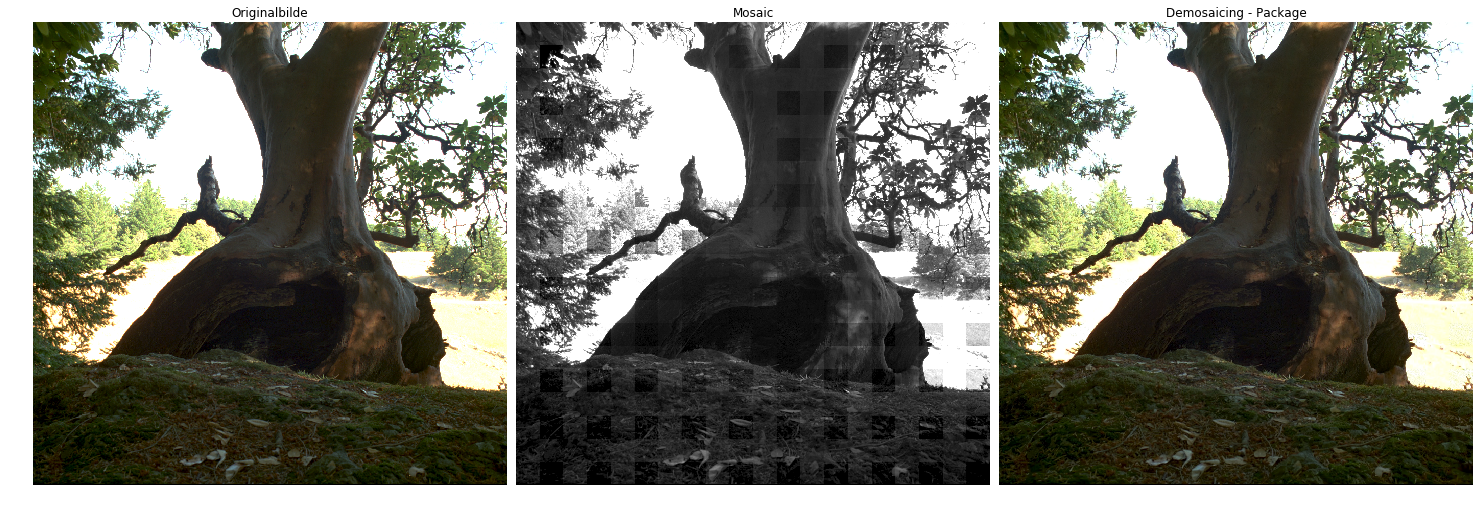

In [33]:
packageDemo(filepath)